# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

## 1. I selected the Book Review Data 
## 2. I will be predicting whether the review is positive or not. The label would be Positive Review column. 
## 3. This is a supervsied learning problem, and it would be a binary classification problem. 
## 4. The feature would be the review. 
## 5. This is an important problem to gather feedback on customer reviews on products such as books, with this information authors can understand areas that need improvement or areas that are thriving. This can lead to better marketing strategies.  



## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE
df.shape

(1973, 2)

In [4]:
df.dtypes

Review             object
Positive Review      bool
dtype: object

In [5]:
df.describe(include='all')

,Review,Positive Review
count,1973,1973
unique,1865,2
top,I have read several of Hiaasen's books and lov...,False
freq,3,993


In [6]:
df.isnull().sum()

Review             0
Positive Review    0
dtype: int64

In [7]:
class_dist = df['Positive Review'].value_counts(normalize=True)
print(class_dist)

False    0.503294
True     0.496706
Name: Positive Review, dtype: float64


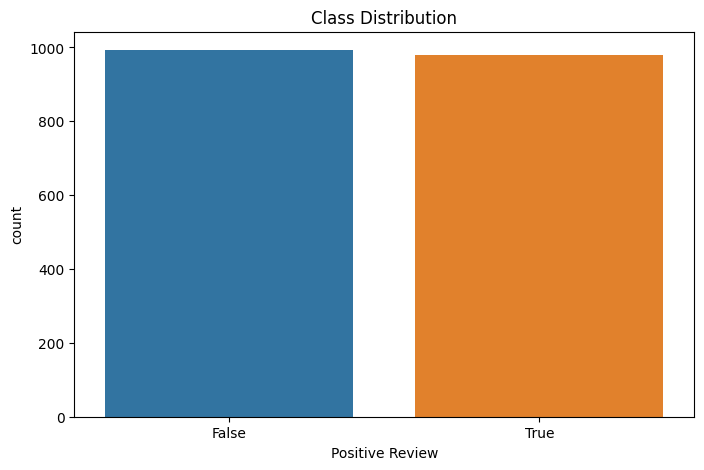

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(x='Positive Review', data=df)
plt.title('Class Distribution')
plt.show()

In [9]:
df['Positive Review'] = df['Positive Review'].astype(int)

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

## There is only one feature column and one label colummn. 
## I would pre process the text to improve prediction accuracy. In other words I would make the feature column into numericals using TFIDF and n grams.
## I would start with a simple machine learning model such as Logistic Regression with TFIDF, then try a sequence to sequence model with TFIDF too. I would measure the performance through F1 score, Accuracy, and improve it through GridSearchCV. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [10]:
# YOUR CODE HERE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import string


2025-07-30 00:52:19.001843: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-07-30 00:52:19.001873: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [11]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text
df['Cleaned_Review'] = df['Review'].apply(preprocess_text)


In [12]:
# YOUR CODE HERE
X = df['Cleaned_Review']
y = df['Positive Review']

In [13]:
print('A Positive Review: \n\n', X[1])
print('A Negative Review: \n\n', X[3])

A Positive Review: 

 this very fascinating book is a story written in the form of numerous letters and personal diary entries made by the principle character of the book  it chronicals the life of a young scottish woman forced to live first in china then japan  well written and historically accurate its obvious the author is intimately familiar with the the culture customs history and life style of japan  this makes the book that much more interesting and fascinating for those who enjoy realism and demand accuracy in a story  for all whove ever lived in japan its a believable tale that literally makes you feel youve stepped back in a time machine to witness the birth of modern japan  for those who havent lived in japan believe that the author has done his homework and is not simply just creating a fictional setting in his mind  because of this hes able to focus on his character versus scenesetting development and thus creates a living breathing person in your mind  the timespan covers

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state=1234)

In [15]:
custom_stopwords = list(ENGLISH_STOP_WORDS -{'not','no','very','too'})

In [16]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2),
    min_df=5,            
    max_df=0.7,          
    max_features=8000,
    stop_words=custom_stopwords,
)

In [17]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
vocabulary_size = len(tfidf_vectorizer.vocabulary_)
print(vocabulary_size)

4138


In [18]:
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_tfidf, y_train)

probability_predictions = logreg_model.predict_proba(X_test_tfidf)[:,1]
class_label_predictions = logreg_model.predict(X_test_tfidf)


In [19]:
print("Accuracy:", accuracy_score(y_test, class_label_predictions))
print("F1 Score:", f1_score(y_test, class_label_predictions))
print("AUC:", roc_auc_score(y_test, probability_predictions))
print("\nClassification Report:")
print(classification_report(y_test, class_label_predictions))

Accuracy: 0.8218623481781376
F1 Score: 0.8274509803921568
AUC: 0.9119177789817596

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       237
           1       0.83      0.82      0.83       257

    accuracy                           0.82       494
   macro avg       0.82      0.82      0.82       494
weighted avg       0.82      0.82      0.82       494



In [20]:
cm = confusion_matrix(y_test, class_label_predictions)

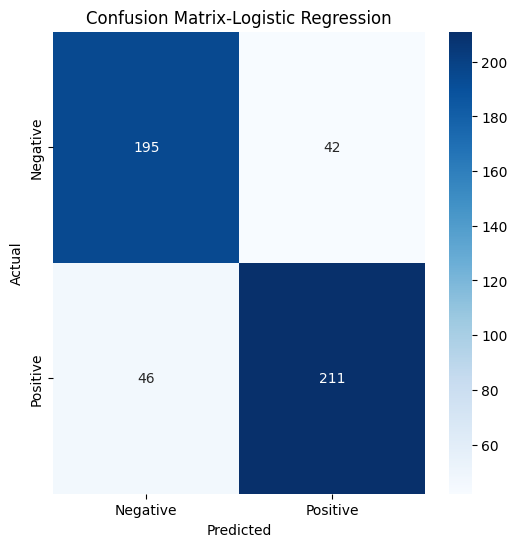

In [21]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix-Logistic Regression')
plt.show()

In [22]:
param_grid = {
    'tfidf__max_df': [0.5, 0.75],
    'tfidf__min_df': [3, 5],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [1, 10]
}

In [23]:
custom_stopwords = list(ENGLISH_STOP_WORDS - {'not', 'no', 'very', 'too'})

In [24]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=custom_stopwords)),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

In [25]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words=['bill',
                                                                    'become',
                                                                    'move',
                                                                    'must',
                                                                    'among',
                                                                    'onto',
                                                                    'whereas',
                                                                    'part',
                                                                    'whenever',
                                                                    'anything',
                                                                    'detail',
                                                                    'whole',
                                                                    'nobody',
                                                                    'they',
                                                                    'anyhow',
                                                                    'cannot',
                                                                    'during',
                                                                    'formerly',
                                                                    'if',
                                                                    'some',
                                                                    'as', 'see',
                                                                    'ever',
                                                                    'perhaps',
                                                                    'those',
                                                                    'get',
                                                                    'down',
                                                                    'between',
                                                                    'find',
                                                                    'after', ...])),
                                       ('clf',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__C': [1, 10], 'tfidf__max_df': [0.5, 0.75],
                         'tfidf__min_df': [3, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='f1', verbose=1)

In [26]:
best_model = grid_search.best_estimator_

In [27]:
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

In [28]:
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
print("AUC:", roc_auc_score(y_test, y_proba_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

Best Parameters: {'clf__C': 10, 'tfidf__max_df': 0.75, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 1)}
Accuracy: 0.8218623481781376
F1 Score: 0.8314176245210728
AUC: 0.9005729859298297

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       237
           1       0.82      0.84      0.83       257

    accuracy                           0.82       494
   macro avg       0.82      0.82      0.82       494
weighted avg       0.82      0.82      0.82       494



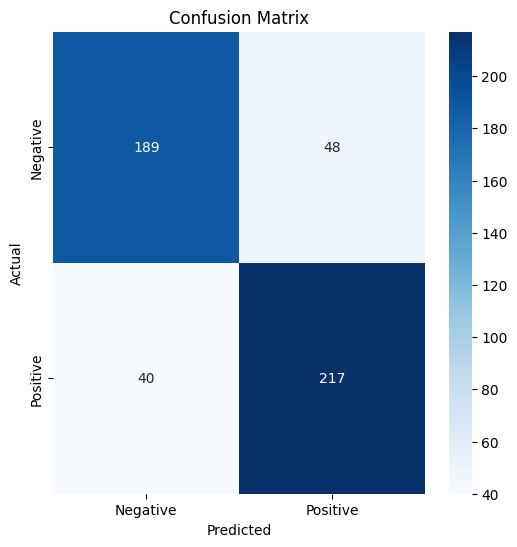

In [29]:
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
sample_reviews = [
    "This book was absolutely wonderful, I couldn't put it down!",
    "The story was boring and the characters were flat.",
    "It was okay, not great but not terrible either.",
    "this very fascinating book is a story written in the form of numerous letters and personal diary entries made by the principle character of the book  it chronicals the life of a young scottish woman forced to live first in china then japan  well written and historically accurate its obvious the author is intimately familiar with the the culture customs history and life style of japan  this makes the book that much more interesting and fascinating for those who enjoy realism and demand accuracy in a story  for all whove ever lived in japan its a believable tale that literally makes you feel youve stepped back in a time machine to witness the birth of modern japan  for those who havent lived in japan believe that the author has done his homework and is not simply just creating a fictional setting in his mind  because of this hes able to focus on his character versus scenesetting development and thus creates a living breathing person in your mind  the timespan covers over 40 years as the story weaves through her trials and tribulations and shows how her fortitude and strength serve her through tumultuous events in her life  a gripping tale that draws on your emotions and has you constantly rooting for her  when the last page is read it leaves you wishing the story would continue but even good books must end  be prepared to sit a spell  once you start reading youll find it hard to put down",
    "the book contained more profanity than i expected to read in a book by rita rudner  i had expected more humor from a comedienne  too bad because i really like her humor"
]

sample_predictions = best_model.predict(sample_reviews)
sample_probabilities = best_model.predict_proba(sample_reviews)[:, 1]

print("\nSample Predictions:")
for review, pred, prob in zip(sample_reviews, sample_predictions, sample_probabilities):
    print(f"\nReview: {review}")
    print(f"Predicted: {'Positive' if pred else 'Negative'}")
    print(f"Probability: {prob:.4f}")	


Sample Predictions:

Review: This book was absolutely wonderful, I couldn't put it down!
Predicted: Positive
Probability: 0.9311

Review: The story was boring and the characters were flat.
Predicted: Negative
Probability: 0.0235

Review: It was okay, not great but not terrible either.
Predicted: Negative
Probability: 0.0888

Review: this very fascinating book is a story written in the form of numerous letters and personal diary entries made by the principle character of the book  it chronicals the life of a young scottish woman forced to live first in china then japan  well written and historically accurate its obvious the author is intimately familiar with the the culture customs history and life style of japan  this makes the book that much more interesting and fascinating for those who enjoy realism and demand accuracy in a story  for all whove ever lived in japan its a believable tale that literally makes you feel youve stepped back in a time machine to witness the birth of modern

## Neural Network 

In [31]:
X_train_nn = X_train_tfidf.toarray()
X_test_nn = X_test_tfidf.toarray()

In [32]:
nn_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_nn.shape[1],)),
    BatchNormalization(),Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer='l2'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

2025-07-30 00:52:27.463399: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-07-30 00:52:27.463436: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2025-07-30 00:52:27.463533: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (i-04c0e8acae05fb5b3): /proc/driver/nvidia/version does not exist
2025-07-30 00:52:27.463881: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [34]:
history = nn_model.fit(
    X_train_nn, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1)

2025-07-30 00:52:27.633087: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2025-07-30 00:52:27.637291: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2649995000 Hz


Epoch 1/20
42/42 [==============================] - 1s 4ms/step - loss: 0.8665 - accuracy: 0.5575 - val_loss: 0.8570 - val_accuracy: 0.5473
Epoch 2/20
42/42 [==============================] - 0s 1ms/step - loss: 0.7097 - accuracy: 0.7378 - val_loss: 0.8159 - val_accuracy: 0.7568
Epoch 3/20
42/42 [==============================] - 0s 1ms/step - loss: 0.5464 - accuracy: 0.8512 - val_loss: 0.7697 - val_accuracy: 0.7568
Epoch 4/20
42/42 [==============================] - 0s 1ms/step - loss: 0.4003 - accuracy: 0.9174 - val_loss: 0.7194 - val_accuracy: 0.7568
Epoch 5/20
42/42 [==============================] - 0s 1ms/step - loss: 0.2987 - accuracy: 0.9527 - val_loss: 0.6751 - val_accuracy: 0.7297
Epoch 6/20
42/42 [==============================] - 0s 1ms/step - loss: 0.2335 - accuracy: 0.9639 - val_loss: 0.6301 - val_accuracy: 0.7365
Epoch 7/20
42/42 [==============================] - 0s 1ms/step - loss: 0.1828 - accuracy: 0.9835 - val_loss: 0.5909 - val_accuracy: 0.7500
Epoch 8/20
42/42 [==

In [35]:
test_loss, test_acc = nn_model.evaluate(X_test_nn, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")


Test Accuracy: 0.8239


In [36]:
y_pred_nn = (nn_model.predict(X_test_nn) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       237
           1       0.84      0.82      0.83       257

    accuracy                           0.82       494
   macro avg       0.82      0.82      0.82       494
weighted avg       0.82      0.82      0.82       494



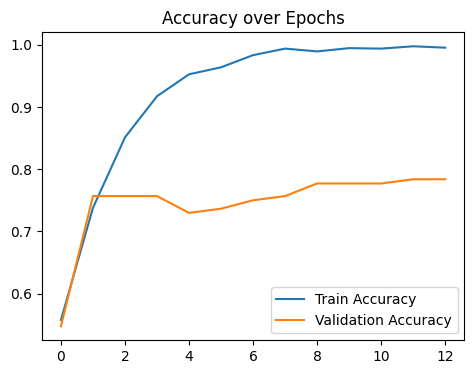

In [37]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

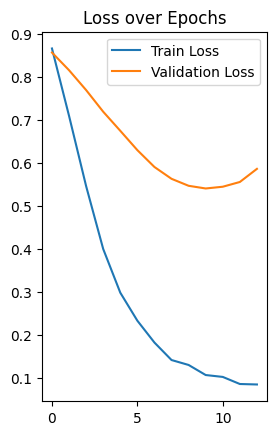

In [38]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()